# Análise

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#padronizar parâmetros dos gráficos com matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
df = pd.read_csv("df_analise.csv", sep=",")

In [7]:
df.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,Unnamed: 2
0,20/05/1987,18.63,NaN
1,21/05/1987,18.45,NaN
2,22/05/1987,18.55,NaN
3,23/05/1987,NaN,NaN
4,24/05/1987,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13370 entries, 0 to 13369
Data columns (total 3 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Data                                                                                                     13370 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366  11074 non-null  float64
 2   Unnamed: 2                                                                                               0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 313.5+ KB


In [9]:
#transformar a data em datetime
df['Data'] = pd.to_datetime(df.Data, format = "%d/%m/%Y")

In [10]:
#renomear coluna de preço
df = df.rename(columns = {'Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366':'Preco'})

In [11]:
df.head()

,Data,Preco,Unnamed: 2
0,1987-05-20,18.63,NaN
1,1987-05-21,18.45,NaN
2,1987-05-22,18.55,NaN
3,1987-05-23,NaN,NaN
4,1987-05-24,NaN,NaN


In [12]:
df_brent_s = pd.Series(df['Preco'].values, index=df['Data'])


In [13]:
df_brent_s.head()

Data
1987-05-20    18.63
1987-05-21    18.45
1987-05-22    18.55
1987-05-23      NaN
1987-05-24      NaN
dtype: float64

In [14]:
type(df_brent_s)

pandas.core.series.Series

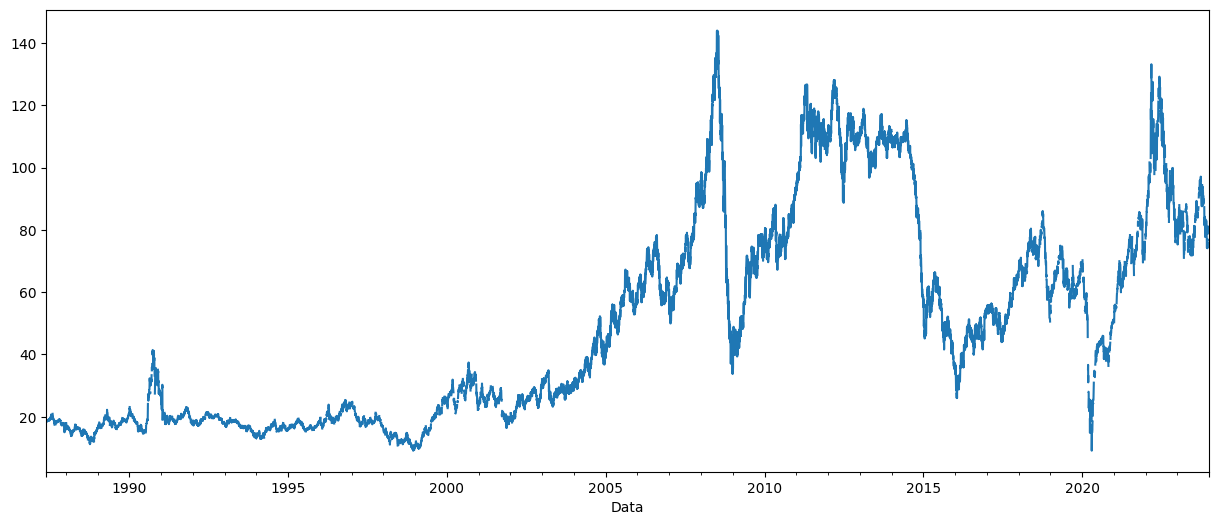

In [15]:
df_brent_s.plot()
plt.show()

In [16]:
df_brent_s.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 13370 entries, 1987-05-20 to 2023-12-26
Series name: None
Non-Null Count  Dtype  
--------------  -----  
11074 non-null  float64
dtypes: float64(1)
memory usage: 208.9 KB


In [17]:
df_brent_s.describe()

count    11074.000000
mean        52.754036
std         33.240415
min          9.100000
25%         20.385000
50%         47.805000
75%         75.547500
max        143.950000
dtype: float64

In [18]:
print("Quantidade de dados nulos: ", df_brent_s.isna().sum().sum())

Quantidade de dados nulos:  2296


In [19]:
df_brent_s.dropna(inplace=True)

In [20]:
print("Quantidade de dados nulos: ", df_brent_s.isna().sum().sum())

Quantidade de dados nulos:  0


In [21]:
import scipy.stats as stats

In [22]:
#verificar se a distribuição é normal
e, p = stats.shapiro(df_brent_s)
print("Estatística de teste: {}".format(e))
print("p-valor: {}".format(p))

Estatística de teste: 0.9094343185424805
p-valor: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Autocorrelação

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

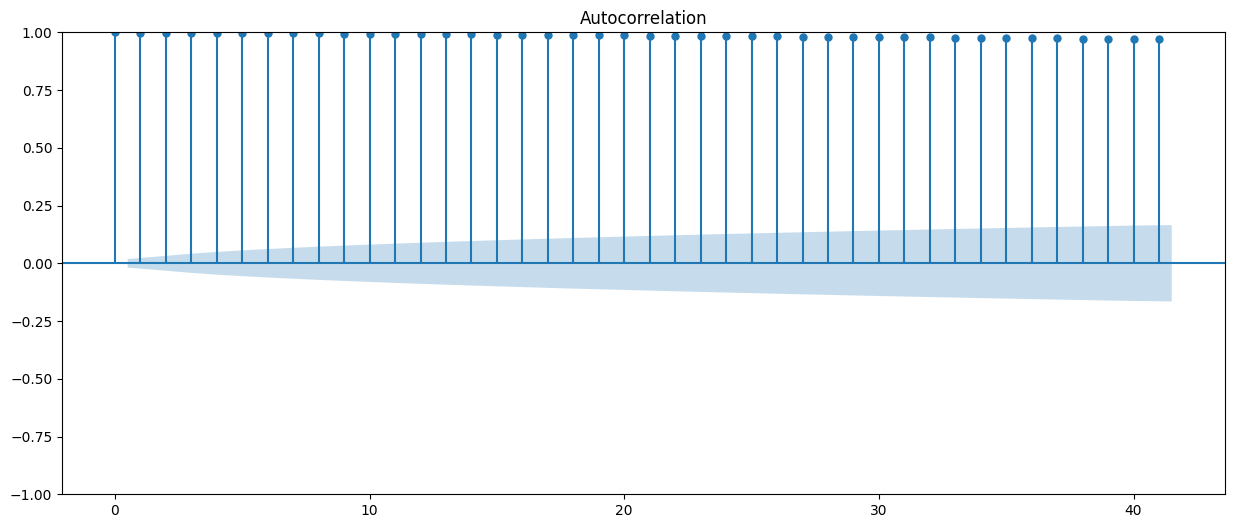

In [24]:
plot_acf(df_brent_s)
plt.show()

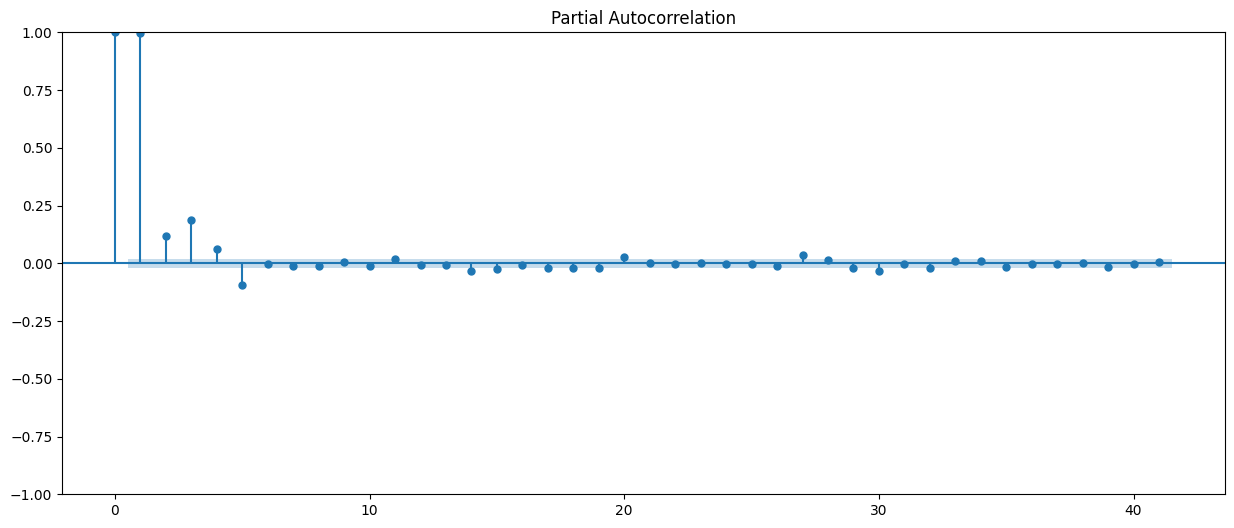

In [25]:
plot_pacf(df_brent_s)
plt.show()

**Como interpretar o gráfico?** As linhas azuis são o intervalo de confiança. Se os lags estão dentro do intervalo de confiança, não há correlação. Se estão fora, há correlação. Se estiver para cima, é autocorrelação positiva e se estiver para baixo, é negativa. Nesse caso, há autocorrelação.

# Decomposição

**Usamos a decomposição para avaliar melhor o comportamento dos dados, separando as visualizações de tendência, sazonalidade e ruído.**

Tendência: mudanças graduais em longo prazo
Sazonalidade: oscilações que ocorrem sempre em um mesmo período (ex: comércio no Natal).
Resíduo: variáveis aleatórias que sobram na série.
Série = tendência + sazonalidade + resíduos

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
resultados = seasonal_decompose(df_brent_s, period=360)

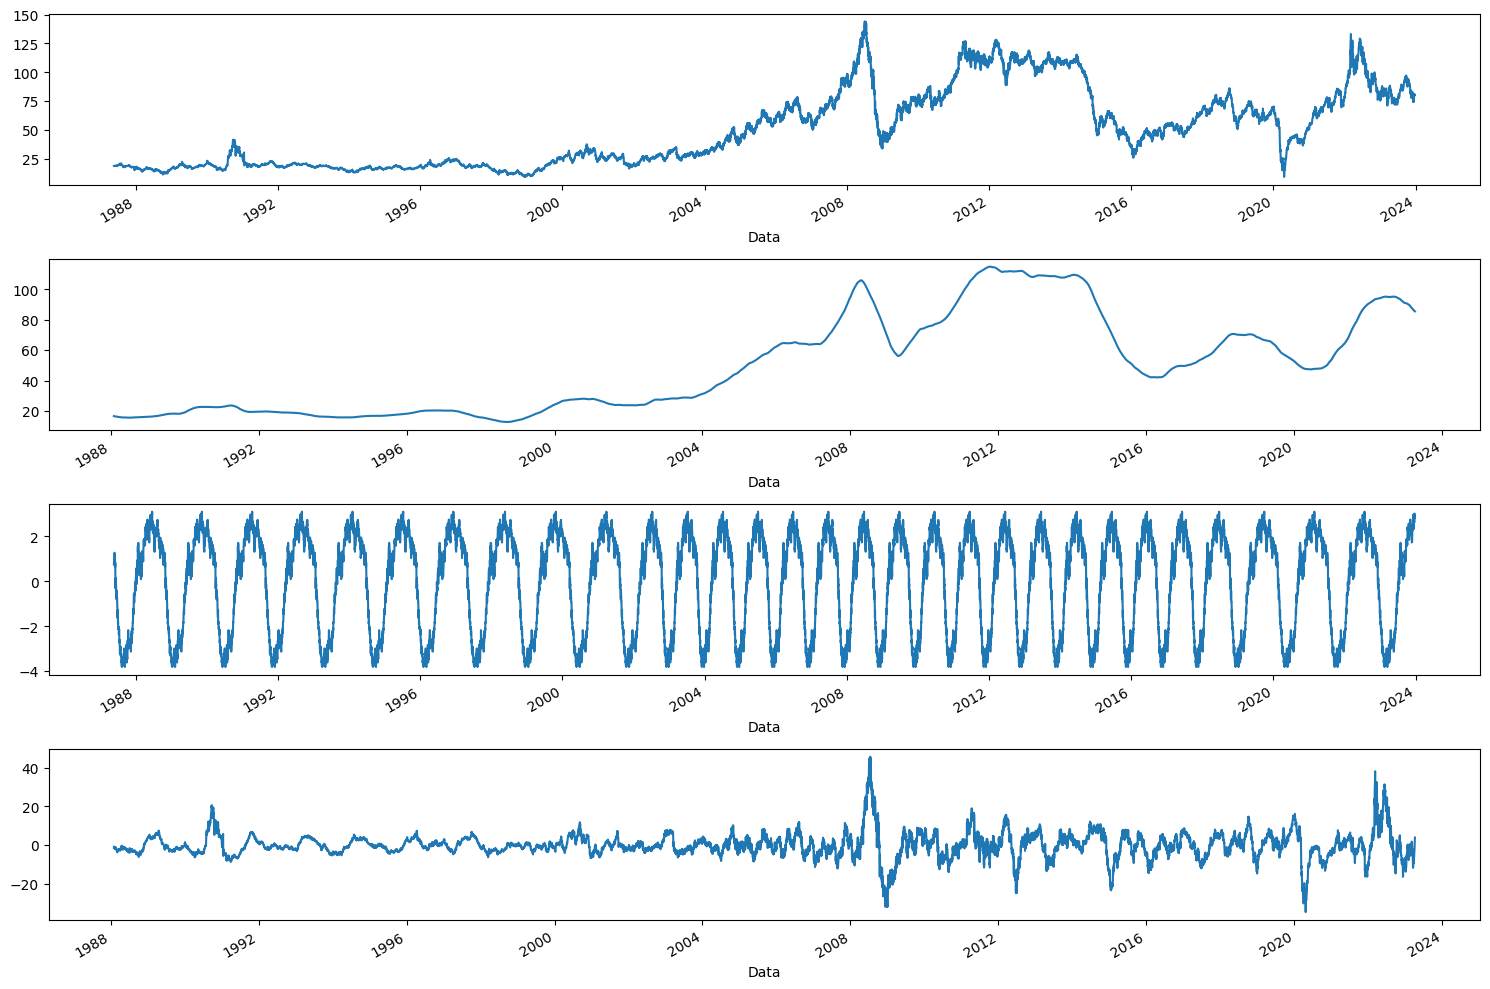

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

# Transformação



Transformar a série para que fique com uma distribuição próxima ao normal, para que os modelos fiquem mais eficientes. Tipos:


**Log:** transformação usada para distribuição assimétrica positiva e variação crescente.


**Exponencial:** usada nos casos em que a log não se aplica.


**Box-Cox:** somente valores positivos


In [29]:
from scipy.stats import normaltest


In [30]:
# Perform D'Agostino and Pearson's test

e, p = normaltest(df_brent_s)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 1872.3757998785325
p-valor: 0.0


P value abaixo de 0.05 indica que a série não tem distribuição normal. Não consegui fazer o teste de Shapiro, pois N > 5000.

In [31]:
#Transformação por log (diminuir variância e melhorar normalidade)
df_brent_s2 = np.log(df_brent_s)

In [32]:
e, p = normaltest(df_brent_s2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 106747.3878820184
p-valor: 0.0


In [33]:
df_brent_s3 = np.log(df_brent_s2)

In [34]:
df_brent_s3 = np.log(df_brent_s2)

e, p = normaltest(df_brent_s3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 9652.74140767531
p-valor: 0.0


In [35]:
df_brent_s4 = np.log(df_brent_s3)

e, p = normaltest(df_brent_s4)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 2391.125353884866
p-valor: 0.0


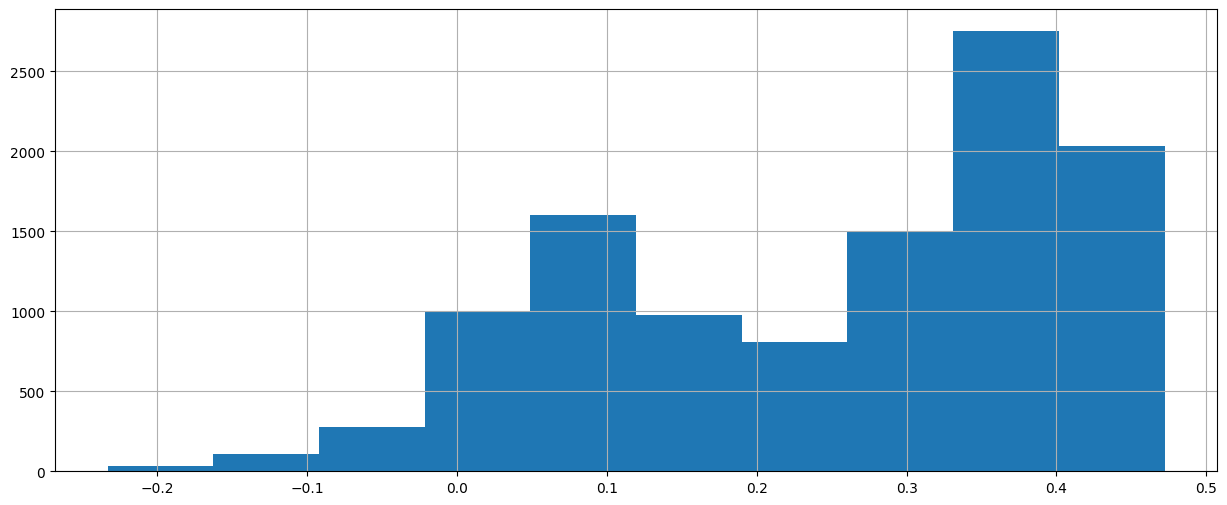

In [36]:
df_brent_s4.hist()
plt.show()

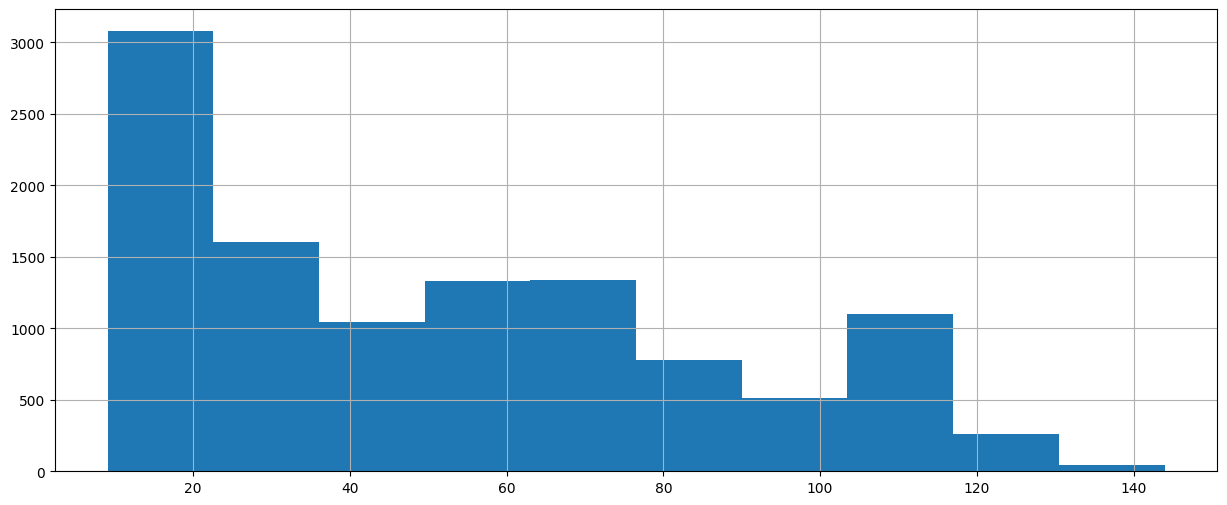

In [37]:
df_brent_s.hist()
plt.show()

Mesmo após algumas tentativas, a série não se aproxima da normalidade, e p-valor continua 0. Tentarei usar modelos que não tem resultados prejudicados pela distribuição da série.

# Estacionaridade


Séries estacionarias tem média e variância constante com o passar do tempo.

In [38]:
import statsmodels.tsa.stattools

**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [39]:
#teste pra verificar estacionaridade
kpss = statsmodels.tsa.stattools.kpss(df_brent_s)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('número de lags: {}'.format(kpss[2]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 10.4590
p_valor: 0.0100
número de lags: 61
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-39-8ff2d59ebc71>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(df_brent_s)


Estatística do teste (10.45) > que valor crítico (5%: 0.46), logo, a série **não** é estacionária






**Teste df (Dickey Fuller)**

Ha = não é estacionário: estatística do teste >= valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [40]:
df = statsmodels.tsa.stattools.adfuller(df_brent_s)
print('Estatística do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: -2.0791
p_valor: 0.25301087
Valores Críticos:
1%: -3.4309
5%: -2.8618
10%: -2.5669


Estatística do teste (-2.07) > que valor crítico (5%: -2.86), logo, a série **não** é estacionária

# Diferenciação

 Transformar série não estacionária em estacionária. Diferença entre dois períodos consecutivos. Isso remove sinais de tendência e reduz a variância. Há dois tipos:


 **Simples:** um período menos o outro.


 **Log return:** subtração de log, elimina tendências em busca da estacionaridade.

In [41]:
df_brent_s_diff = df_brent_s.diff()

In [42]:
df_brent_s_diff = df_brent_s_diff.dropna()

In [43]:
df = statsmodels.tsa.stattools.adfuller(df_brent_s_diff)
print('Estatística do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: -17.1664
p_valor: 0.00000000
Valores Críticos:
1%: -3.4309
5%: -2.8618
10%: -2.5669


Estatística do teste (-17) < que valor crítico (5%: -2.86), logo, a série foi transformada em estacionária após a diferenciação de primeira ordem.

# TRANSFORMAÇÃO + DIFERENCIAÇÃO (usando a média)




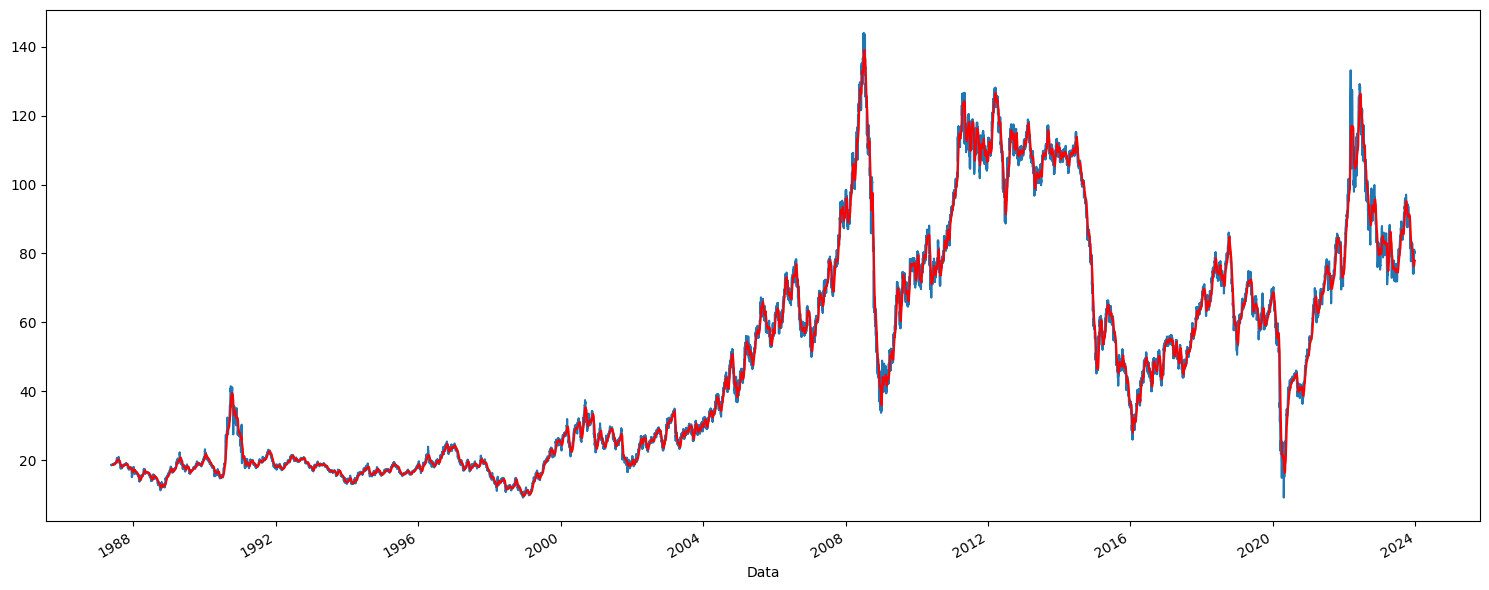

In [44]:
ma = df_brent_s.rolling(12).mean()

f, ax = plt.subplots()
df_brent_s.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

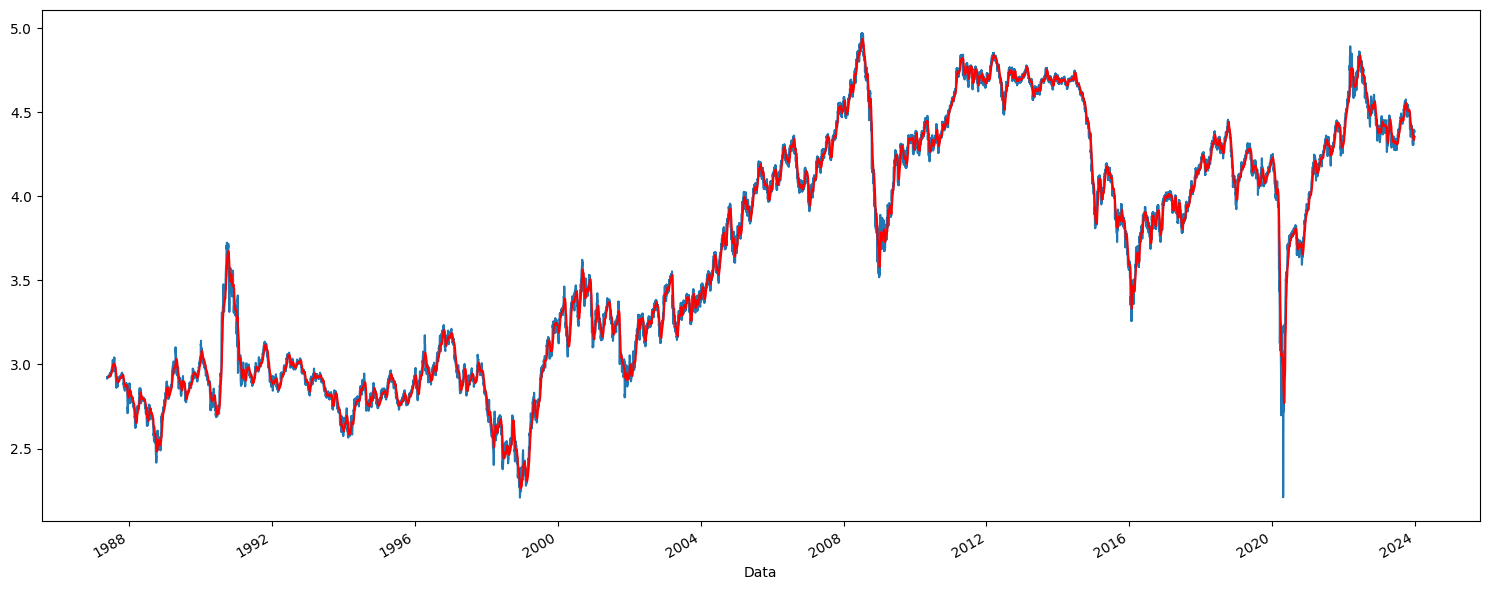

In [45]:
df_log = np.log(df_brent_s)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

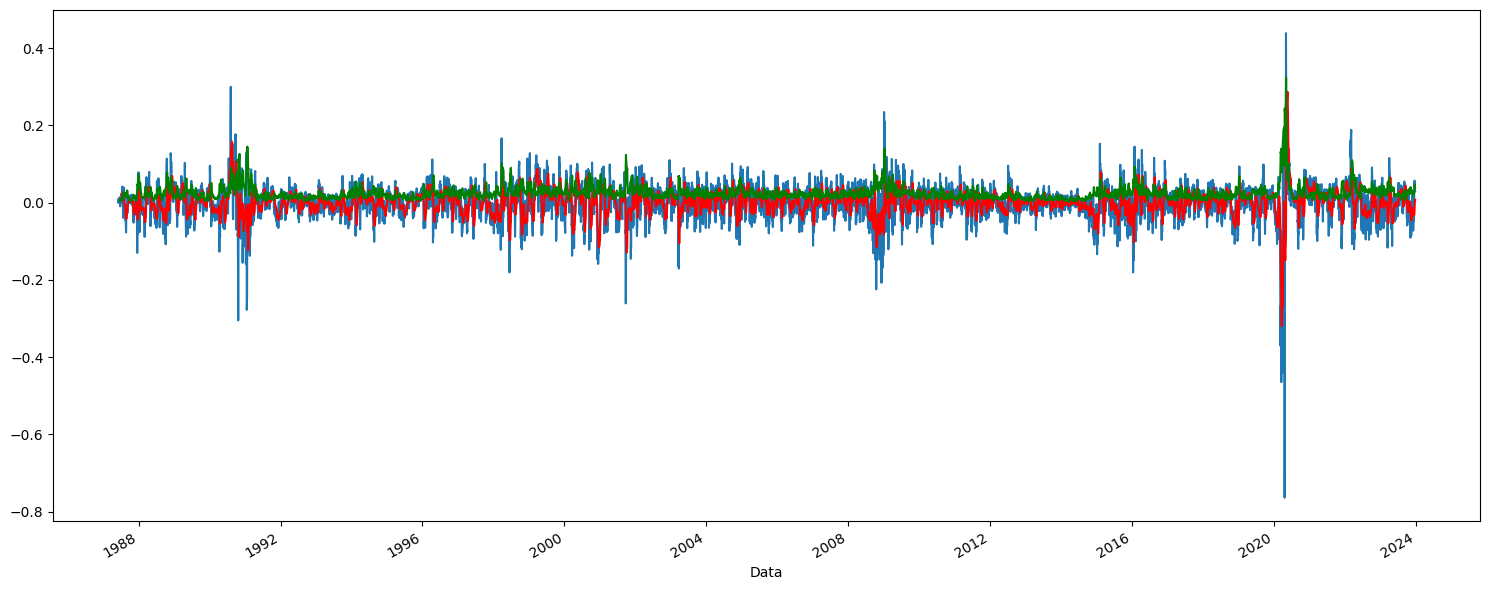

In [46]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [47]:
df = statsmodels.tsa.stattools.adfuller(df_s)
print('Estatística do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: -17.5735
p_valor: 0.00000000
Valores Críticos:
1%: -3.4309
5%: -2.8618
10%: -2.5669


Estatística do teste (-17) < que valor crítico (5%: -2.86), logo, a série foi transformada em estacionária usando log.

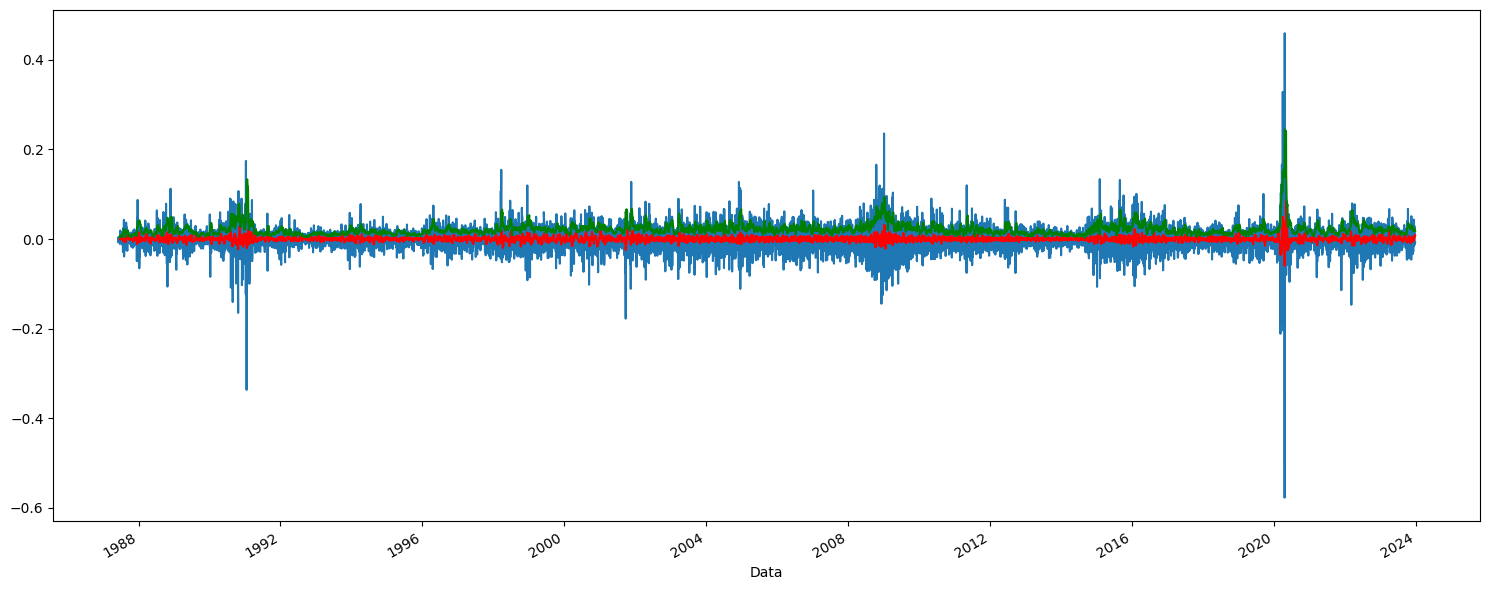

In [48]:
#usando a diferenciação pra transformar a série em "mais" estacionária:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


In [49]:
df_diff.dropna(inplace=True)

In [50]:
df = statsmodels.tsa.stattools.adfuller(df_diff)
print('Estatística do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: -25.0810
p_valor: 0.00000000
Valores Críticos:
1%: -3.4309
5%: -2.8618
10%: -2.5669


Estatística do teste (-25) < que valor crítico (5%: -2.86), logo, a série foi transformada em estacionária usando log e diff.

# Preparação da série diff para modelos



**Escolhi usar a série df_diff que passou pela suavização da média, com uso de log e diff.**

In [51]:
#Transformar a série em dataframe para padronizar o nome das colunas:
df_modelo = df_diff.to_frame(name='y')

In [52]:
df_modelo.head()

,y
Data,
1987-06-05,-0.007036
1987-06-08,0.004003
1987-06-09,0.000572
1987-06-10,-0.000803
1987-06-11,-0.005562


In [53]:
df_modelo = df_modelo.reset_index()

In [54]:
df_modelo

,Data,y
0,1987-06-05,-0.007036
1,1987-06-08,0.004003
2,1987-06-09,0.000572
3,1987-06-10,-0.000803
4,1987-06-11,-0.005562
...,...,...
11057,2023-12-19,0.010563
11058,2023-12-20,0.012832
11059,2023-12-21,-0.008223
11060,2023-12-22,-0.012578


In [55]:
#criação da coluna unique_id para uso futuro nos modelos/gráficos
df_modelo["unique_id"] = 'Brent'

In [56]:
df_modelo = df_modelo.rename(columns={'Data': 'ds'})

In [57]:
df_modelo.head()

,ds,y,unique_id
0,1987-06-05,-0.007036,Brent
1,1987-06-08,0.004003,Brent
2,1987-06-09,0.000572,Brent
3,1987-06-10,-0.000803,Brent
4,1987-06-11,-0.005562,Brent


In [58]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11062 entries, 0 to 11061
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         11062 non-null  datetime64[ns]
 1   y          11062 non-null  float64       
 2   unique_id  11062 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 259.4+ KB


In [59]:
#Calcular data de separação da base em treino e teste, considerando 80% dos dados para treino e 20% para teste.
split_point = int(len(df_modelo) * 0.8)
split_date = df_modelo.iloc[split_point]['ds']

In [60]:
treino = df_modelo[df_modelo['ds'] < split_date]
valid = df_modelo[df_modelo['ds'] >= split_date]

In [61]:
#Info da divisão dos dados
print(f"Split Date: {split_date}")
print(f"Training set size: {len(treino)}, Validation set size: {len(valid)}")

Split Date: 2016-04-19 00:00:00
Training set size: 8849, Validation set size: 2213


In [62]:
h = valid.index.nunique()
h

2213

In [63]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

# Preparação da série sem diff para modelos

In [64]:
df_brent = df_brent_s.to_frame(name='y')

In [65]:
df_brent.head()

,y
Data,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [66]:
df_brent = df_brent.reset_index()

In [67]:
df_brent["unique_id"] = 'Brent'

In [68]:
df_brent = df_brent.rename(columns={'Data': 'ds', '0': 'y'})

In [69]:
df_brent.head()

,ds,y,unique_id
0,1987-05-20,18.63,Brent
1,1987-05-21,18.45,Brent
2,1987-05-22,18.55,Brent
3,1987-05-25,18.60,Brent
4,1987-05-26,18.63,Brent


In [70]:
#Calcular data de separação da base em treino e teste, considerando 80% dos dados para treino e 20% para teste.
#split_point = int(len(df_brent) * 0.8)
#split_date = df_brent.iloc[split_point]['ds']

In [71]:
#treino = df_brent[df_brent['ds'] < split_date]
#valid = df_brent[df_brent['ds'] >= split_date]

In [72]:
treino = df_brent.loc[df_brent['ds'] < '2023-01-01']
valid = df_brent.loc[(df_brent['ds'] >= '2023-01-01')]

In [73]:
h = valid.index.nunique()
h

248

In [74]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

# Modelos

In [75]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.7 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.2.0-py3-none-any.whl size=158196 sha256=2464ba260a6febd003770fc9833411ff60b8765180bb6a6929c6cf6912454e2a
  Stored in directory: /root/.cache/pip/wheels/5a/b5/4e/216953a1c711da55de29ed7ecf158b4a5bf32ef93d69ad66dd
Successfully built fugue-sql-antlr


In [76]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Modelo 1 (Naive)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 5.39%


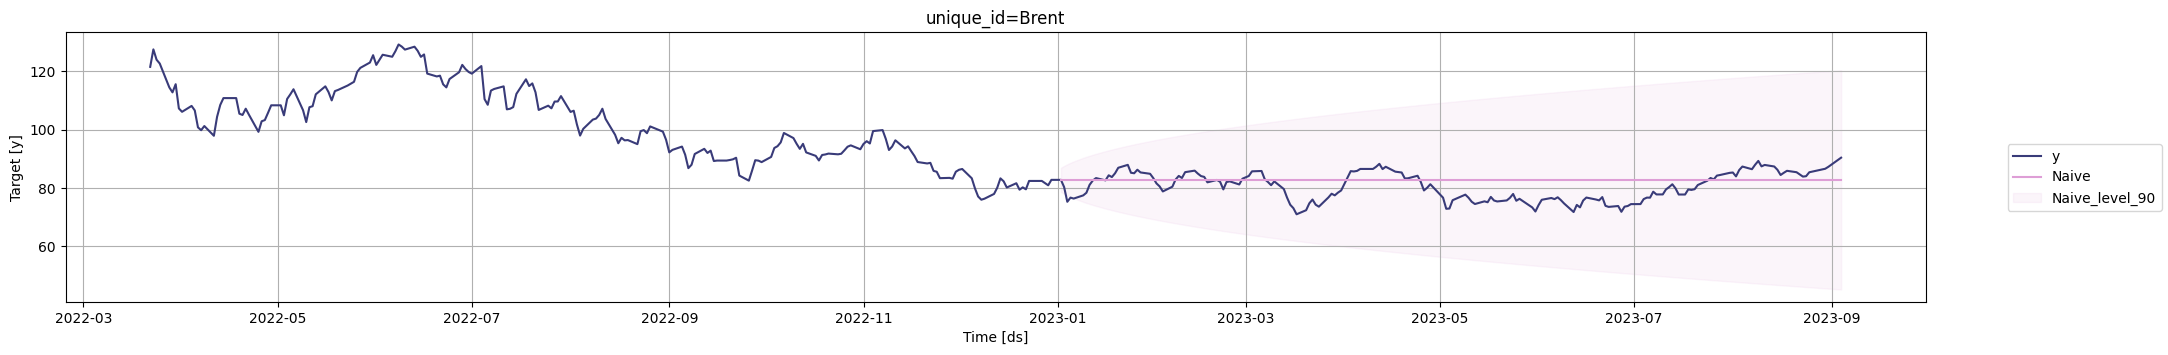

In [77]:
#solução usando o último dia do período de treino pra prever o período de teste
model = StatsForecast(models=[Naive()], freq='D', n_jobs=5)  #criar a classe model. Usar models como "naive" (modelo escolhido), frequência de medição (diária), n_jobs=número de CPUs/núcleos do processador usadas (-1 significa usar todas as CPUs)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])  #predição: variável h (horizonte), level: nível de predição (nesse caso 90%)

forecast_df = forecast_df.merge(valid, on=['ds', 'unique_id'], how='left') #fazer merge da tabela de dados preditos com dados de validação. Equivalente ao left join (queremos ver o modelo com base na tabela da esquerda e o que é comum com a tabela da direita)
forecast_df = forecast_df.dropna()

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values) #pegar os valores da coluna y (verdadeiro) e os valores do Naive (predito)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=["Brent"],engine ='matplotlib', max_insample_length=200)

In [78]:
forecast_df

,ds,unique_id,Naive,Naive-lo-90,Naive-hi-90,y
2,2023-01-02,Brent,82.82,78.690025,86.949974,82.82
3,2023-01-03,Brent,82.82,78.051109,87.588890,80.36
4,2023-01-04,Brent,82.82,77.488220,88.151779,75.31
5,2023-01-05,Brent,82.82,76.979332,88.660667,76.73
6,2023-01-06,Brent,82.82,76.511353,89.128647,76.41
...,...,...,...,...,...,...
237,2023-08-25,Brent,82.82,46.034592,119.605408,85.42
241,2023-08-29,Brent,82.82,45.726761,119.913239,86.37
242,2023-08-30,Brent,82.82,45.650200,119.989799,86.62
243,2023-08-31,Brent,82.82,45.573799,120.066200,87.29


## Modelo 2 (Seasonal Naive)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 5.25%


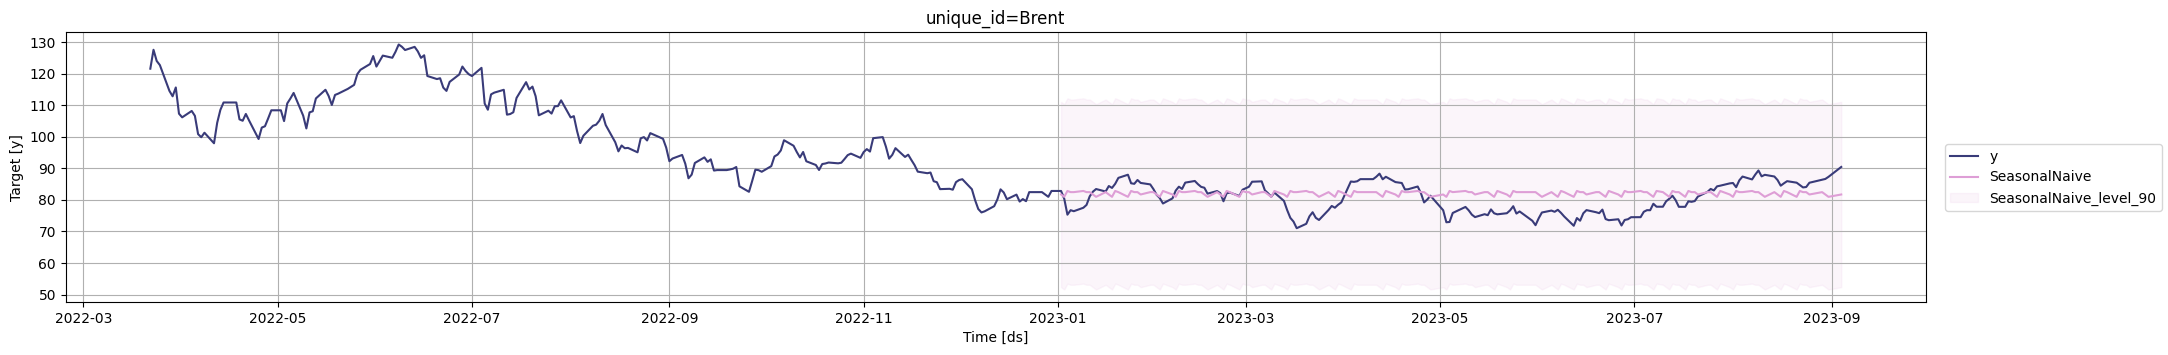

In [79]:
#trabalhar com modelo de baseline (ainda baseado nos últimos valores de treino), porém considerando a sazonalidade
#pra isso, usamos o modelo SeasonalNaive, usando os dados de 1 semana pra prever
model_s = StatsForecast(models=[SeasonalNaive(season_length=5)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfs = forecast_dfs.dropna()

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=["Brent"],engine ='matplotlib', max_insample_length=200)

In [80]:
forecast_dfs.head(100)

,unique_id,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,y
2,Brent,2023-01-02,81.699997,52.368313,111.031685,82.82
3,Brent,2023-01-03,80.959999,51.628315,110.291687,80.36
4,Brent,2023-01-04,82.820000,53.488316,112.151688,75.31
5,Brent,2023-01-05,82.449997,53.118313,111.781685,76.73
6,Brent,2023-01-06,82.449997,53.118313,111.781685,76.41
...,...,...,...,...,...,...
138,Brent,2023-05-18,80.959999,51.628315,110.291687,75.75
139,Brent,2023-05-19,82.820000,53.488316,112.151688,75.42
142,Brent,2023-05-22,81.699997,52.368313,111.031685,75.77
143,Brent,2023-05-23,80.959999,51.628315,110.291687,76.66


## Modelo 3 (Seasonal Window Average)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 5.22%


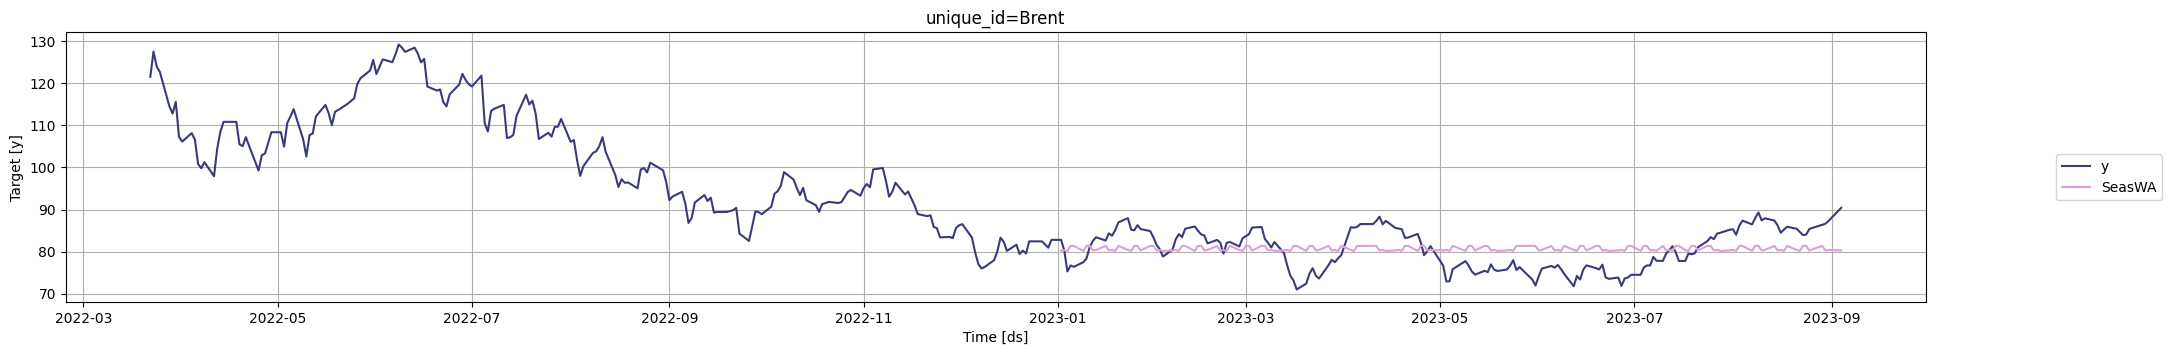

In [81]:
#trabalhar com modelo de baseline (ainda baseado nos últimos valores de treino), considerando a sazonalidade e a média móvel (window_size)
#pra isso, usamos o modelo SeasonalWindowAverage, usando os dados de 1 semana pra prever e média das últimas 4 semanas
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=5, window_size=4)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h)
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfsm = forecast_dfsm.dropna()

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, unique_ids=["Brent"],engine ='matplotlib', max_insample_length=200)

In [82]:
forecast_dfsm.head(10)

,unique_id,ds,SeasWA,y
2,Brent,2023-01-02,80.302498,82.82
3,Brent,2023-01-03,80.412498,80.36
4,Brent,2023-01-04,80.190002,75.31
5,Brent,2023-01-05,81.389999,76.73
6,Brent,2023-01-06,81.367500,76.41
9,Brent,2023-01-09,80.190002,77.50
10,Brent,2023-01-10,81.389999,78.40
11,Brent,2023-01-11,81.367500,81.11
12,Brent,2023-01-12,80.302498,82.59
13,Brent,2023-01-13,80.412498,83.43


## Modelo 4 (AutoArima)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 5.31%


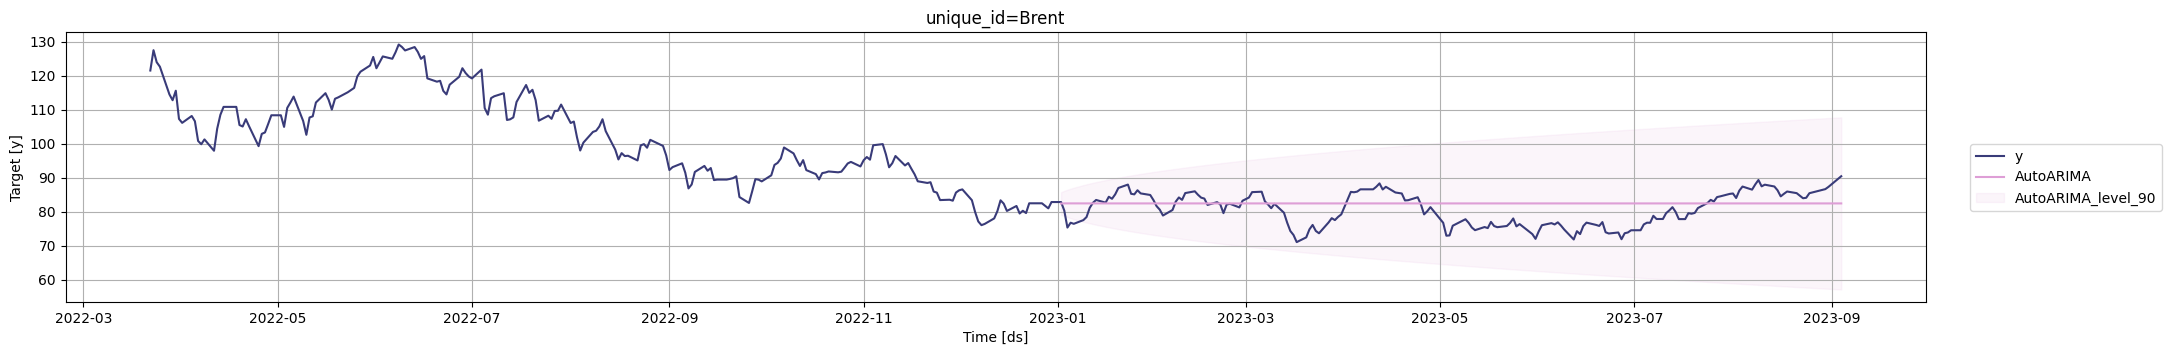

In [83]:
#AR: Modelo autoregressivo (olha para os dados do passado e acha uma correlação futura)
#I: Integrado (quantidade que a série foi diferenciada) - ele tenta transformar a série estacionária em não estacionária
#MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=30)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfa = forecast_dfa.dropna()

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], engine ='matplotlib', max_insample_length=200)

**Conclusão: como todos os modelos tem wmape bem parecidos, optamos por usar o AutoARIMA pela facilidade e pela diferenciação automática dos dados.**